<a href="https://colab.research.google.com/github/FSMahi/Python-for-Data-analysis/blob/main/Exploratory_Data_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


###  Introduction

The **Stack Overflow Developer Survey 2020** is one of the most comprehensive datasets capturing the perspectives, experiences, and preferences of software developers around the world. With responses from nearly **65,000 developers**, the survey provides valuable insights into various aspects of the global programming community—including demographics, education, employment, tools, technologies, and developer opinions.

This project aims to explore and analyze key trends and patterns from the 2020 survey using Python-based data analysis tools such as **Pandas**, **Matplotlib**, and **Seaborn**. Through data cleaning, visualization, and statistical summarization, we will address questions like:

* What are the most popular programming languages and technologies?
* How do education and age impact programming careers?
* What roles are developers working in, especially those related to data science?
* What are the trends in gender distribution and work habits?
* What languages are most loved, wanted, and dreaded by developers?

We will also examine differences across **age groups**, **education levels**, and **gender**, and compare the experiences of **students** vs. **professionals**. The goal is to derive meaningful conclusions that highlight not only the current state of the developer ecosystem in 2020 but also its direction for the future.

This analysis serves as a foundation for anyone interested in understanding the evolving landscape of the software development industry—from beginners and students to educators, researchers, and hiring managers.


# Importing Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

# Create raw data frame from csv file.

In [2]:
survey_raw_df = pd.read_csv('survey_results_public.csv')
survey_raw_df

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20853,20934,I am a developer by profession,Yes,26.0,19,Yearly,540000.0,7539.0,India,Indian rupee,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",Angular;jQuery;Spring,Angular;jQuery;Laravel;Spring,Just as welcome now as I felt last year,63.0,7,4
20854,20935,I am a developer by profession,Yes,20.0,8,Monthly,NaN,NaN,India,Indian rupee,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Express;Gatsby;React.js;Vue.js,Express,Just as welcome now as I felt last year,30.0,6,1
20855,20936,I am a developer by profession,Yes,NaN,9,Monthly,12250.0,24156.0,Turkey,Turkish lira,...,Neither easy nor difficult,Appropriate in length,No,"A business discipline (such as accounting, fin...",Vue.js,Angular;Angular.js;ASP.NET;ASP.NET Core;jQuery...,A lot more welcome now than last year,8.0,3,11
20856,20937,I am a student who is learning to code,No,21.0,18,NaN,NaN,NaN,Pakistan,NaN,...,Neither easy nor difficult,Too long,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,3,NaN


In [3]:
survey_raw_df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [4]:
schema_fname= 'survey_results_schema.csv'
schema_raw_df = pd.read_csv(schema_fname,index_col='Column').QuestionText
schema_raw_df

,QuestionText
Column,
Respondent,Randomized respondent ID number (not in order ...
MainBranch,Which of the following options best describes ...
Hobbyist,Do you code as a hobby?
Age,What is your age (in years)? If you prefer not...
Age1stCode,At what age did you write your first line of c...
...,...
WebframeWorkedWith,Which web frameworks have you done extensive d...
WelcomeChange,"Compared to last year, how welcome do you feel..."
WorkWeekHrs,"On average, how many hours per week do you wor..."


In [5]:
pd.read_csv(schema_fname)


,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,Age,What is your age (in years)? If you prefer not...
4,Age1stCode,At what age did you write your first line of c...
...,...,...
56,WebframeWorkedWith,Which web frameworks have you done extensive d...
57,WelcomeChange,"Compared to last year, how welcome do you feel..."
58,WorkWeekHrs,"On average, how many hours per week do you wor..."
59,YearsCode,"Including any education, how many years have y..."


In [6]:
schema_raw_df.loc['Hobbyist']

'Do you code as a hobby?'

In [7]:
schema_raw_df['WelcomeChange']

'Compared to last year, how welcome do you feel on Stack Overflow?'

# Data Preprocessing and Cleaning

While the survey responses contain a wealth of information, we'll limit our analysis to the following areas:

   --Demographics of the survey respondents & the global programming community

   --Distribution of programming skills, experience and preferences

   --Employment-related information, preferences & opinions

Let's select a subset of columns with the relevant data for our analysis.

In [8]:
selected_columns= [
    #Dermoghrafics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    #programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck' ,
    #employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt'


]

In [9]:
len(selected_columns)

20

In [10]:
survey_df= survey_raw_df[selected_columns].copy()
survey_df

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
0,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13,36,27,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,Once a year,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",50.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important
1,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19,7,4,JavaScript;Swift,Python;Swift,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,NaN,NaN,Fairly important
2,Russian Federation,NaN,NaN,NaN,NaN,Yes,15,4,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,Once a decade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18,7,4,NaN,NaN,Once a year,NaN,NaN,NaN,40.0,Slightly dissatisfied,Flex time or a flexible schedule;Office enviro...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary
4,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16,15,8,HTML/CSS;Ruby;SQL,Java;Ruby;Scala,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,NaN,NaN,NaN,NaN,NaN,Very important
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20853,India,26.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,19,7,4,Java;JavaScript;PHP;Python,Java;Python,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, back-end;Developer, front-end;Devel...",63.0,Neither satisfied nor dissatisfied,Diversity of the company or organization;Langu...,Sometimes: 1-2 days per month but less than we...,Very important
20854,India,20.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,8,6,1,C;C#;Dart;HTML/CSS;Java;JavaScript;PHP;SQL,Dart;Go;HTML/CSS;JavaScript;Kotlin;SQL;Swift;T...,Every few months,Play games;Visit Stack Overflow;Watch help / t...,Employed part-time,"Developer, back-end;Developer, full-stack;Deve...",30.0,Very satisfied,"Industry that I’d be working in;Languages, fra...",Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary
20855,Turkey,NaN,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","A business discipline (such as accounting, fin...",Yes,9,3,11,C#;HTML/CSS;JavaScript;SQL;TypeScript,Go,Once a year,Play games;Visit Stack Overflow;Go for a walk ...,Employed full-time,"Developer, back-end;Developer, desktop or ente...",8.0,Very satisfied,Remote work options;Office environment or comp...,Sometimes: 1-2 days per month but less than we...,Not at all important/not necessary
20856,Pakistan,21.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,18,3,NaN,Assembly;C;C#;C++;HTML/CSS;Java;JavaScript;PHP...,Java;Kotlin;Objective-C;R;Swift,Every few months,NaN,Student,NaN,NaN,NaN,"Flex time or a flexible schedule;Languages, fr...",NaN,NaN


In [11]:
schema = schema_raw_df[selected_columns]
schema

,QuestionText
Column,
Country,Where do you live?
Age,What is your age (in years)? If you prefer not...
Gender,"Which of the following describe you, if any? P..."
EdLevel,Which of the following best describes the high...
UndergradMajor,What was your primary field of study?
Hobbyist,Do you code as a hobby?
Age1stCode,At what age did you write your first line of c...
YearsCode,"Including any education, how many years have y..."
YearsCodePro,"NOT including education, how many years have y..."


In [12]:
survey_df.shape

(20858, 20)

In [13]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20858 entries, 0 to 20857
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 20858 non-null  object 
 1   Age                     18069 non-null  float64
 2   Gender                  19914 non-null  object 
 3   EdLevel                 20337 non-null  object 
 4   UndergradMajor          18263 non-null  object 
 5   Hobbyist                20858 non-null  object 
 6   Age1stCode              20681 non-null  object 
 7   YearsCode               20626 non-null  object 
 8   YearsCodePro            16984 non-null  object 
 9   LanguageWorkedWith      20599 non-null  object 
 10  LanguageDesireNextYear  19465 non-null  object 
 11  NEWLearn                20062 non-null  object 
 12  NEWStuck                20450 non-null  object 
 13  Employment              20775 non-null  object 
 14  DevType                 18076 non-null

In [14]:
schema['Age1stCode']

'At what age did you write your first line of code or program? (e.g., webpage, Hello World, Scratch project)'

In [15]:
survey_df['Age1stCode'].unique()

array(['13', '19', '15', '18', '16', '14', '12', '20', '42', '8', '25',
       '22', '30', '17', '21', '10', '46', '9', '7', '11', '6', nan, '31',
       '29', '5', 'Younger than 5 years', '28', '38', '23', '27', '41',
       '24', '53', '26', '35', '32', '40', '33', '36', '54', '48', '56',
       '45', '44', '34', 'Older than 85', '39', '51', '68', '50', '37',
       '47', '43', '52', '85', '64', '55'], dtype=object)

In [16]:
survey_df['Age1stCode']= pd.to_numeric(survey_df['Age1stCode'],errors='coerce')
survey_df['YearsCode']= pd.to_numeric(survey_df['YearsCode'],errors='coerce')
survey_df['YearsCodePro']= pd.to_numeric(survey_df['YearsCodePro'],errors='coerce')

lets view some basic statistics about the numeric columns

In [17]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,18069.000000,20555.000000,20370.000000,16320.000000,15855.000000
mean,31.190536,15.384627,13.331861,9.184865,40.757470
std,9.758108,5.084960,9.720228,7.884629,16.970974
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,25.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,7.000000,40.000000
75%,36.000000,18.000000,18.000000,12.000000,43.000000
max,279.000000,85.000000,50.000000,50.000000,425.000000


delete the row from data where age is greater than 100 and less than 10. This mistake is happen in real world data that some data no makes sense.

In [18]:
survey_df.drop(survey_df[survey_df['Age']<10].index,inplace=True)
survey_df.drop(survey_df[survey_df['Age']>100].index,inplace=True)

The same work for WorkWeekHrs as a person can not work higher than 140 hrs (20 hrs per day)

In [19]:
survey_df.drop(survey_df[survey_df['WorkWeekHrs']>140].index,inplace=True)

In [20]:
survey_df['Gender'].value_counts()

,count
Gender,
Man,18341
Woman,1294
"Non-binary, genderqueer, or gender non-conforming",129
"Man;Non-binary, genderqueer, or gender non-conforming",37
Woman;Man,30
"Woman;Non-binary, genderqueer, or gender non-conforming",27
"Woman;Man;Non-binary, genderqueer, or gender non-conforming",10


In [21]:
import numpy as np

In [22]:
survey_df.where(~(survey_df.Gender.str.contains(';',na=False)),np.nan,inplace=True)

In [23]:
survey_df['Gender'].value_counts()

,count
Gender,
Man,18341
Woman,1294
"Non-binary, genderqueer, or gender non-conforming",129


In [24]:
survey_df.sample(10)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
13171,Nepal,23.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,9.0,8.0,2.0,C#;HTML/CSS;Java;JavaScript;PHP;SQL;VBA,Bash/Shell/PowerShell,Once a year,Visit Stack Overflow;Do other work and come ba...,Employed full-time,"Developer, back-end",60.0,Slightly dissatisfied,Diversity of the company or organization;Remot...,Often: 1-2 days per week or more,Fairly important
7131,Russian Federation,25.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,11.0,15.0,5.0,Bash/Shell/PowerShell;Java;SQL,Java;SQL,Once a year,Visit Stack Overflow;Watch help / tutorial videos,Employed full-time,"Developer, back-end;Developer, QA or test;DevO...",40.0,Very dissatisfied,Flex time or a flexible schedule;How widely us...,Occasionally: 1-2 days per quarter but less th...,Somewhat important
18931,Costa Rica,19.0,Woman,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",No,15.0,4.0,1.0,HTML/CSS;JavaScript;PHP;SQL,NaN,Once every few years,Visit Stack Overflow;Watch help / tutorial videos,Employed full-time,"Database administrator;Designer;Developer, bac...",8.0,Neither satisfied nor dissatisfied,Flex time or a flexible schedule;Remote work o...,Often: 1-2 days per week or more,Very important
15276,Brazil,36.0,Man,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Yes,29.0,9.0,5.0,C#;Java,C#;Kotlin,Once every few years,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, mobile",40.0,Slightly dissatisfied,"Flex time or a flexible schedule;Languages, fr...",Occasionally: 1-2 days per quarter but less th...,Somewhat important
17306,Philippines,20.0,Man,"Secondary school (e.g. American high school, G...",NaN,Yes,13.0,8.0,4.0,HTML/CSS;JavaScript;PHP;SQL;Swift,Bash/Shell/PowerShell;Go;HTML/CSS;JavaScript;P...,Every few months,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, full-stack;Engineering manager;Prod...",8.0,Slightly satisfied,How widely used or impactful my work output wo...,Often: 1-2 days per week or more,Fairly important
1197,Mexico,38.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,15.0,12.0,6.0,HTML/CSS;JavaScript;PHP;SQL,Dart;HTML/CSS;JavaScript;PHP;Python;SQL,Once every few years,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Database administrator;Developer, back-end;Dev...",40.0,Neither satisfied nor dissatisfied,"Flex time or a flexible schedule;Languages, fr...",Occasionally: 1-2 days per quarter but less th...,Very important
13941,Germany,28.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,13.0,4.0,2.0,Bash/Shell/PowerShell;C;C++,NaN,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, back-end;Developer, front-end",40.0,Neither satisfied nor dissatisfied,"Industry that I’d be working in;Languages, fra...",Never,Very important
4013,United Kingdom,57.0,Man,"Associate degree (A.A., A.S., etc.)","A natural science (such as biology, chemistry,...",Yes,20.0,37.0,25.0,C;C++;HTML/CSS,Objective-C;Python;Swift,Once every few years,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,Scientist,45.0,Very satisfied,Industry that I’d be working in;Flex time or a...,Often: 1-2 days per week or more,Very important
9790,Germany,24.0,Woman,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Another engineering discipline (such as civil,...",Yes,18.0,6.0,2.0,Bash/Shell/PowerShell;C++;HTML/CSS;Java;Python...,Bash/Shell/PowerShell;HTML/CSS;JavaScript;PHP;...,Every few months,Ca

# Exploratory Analysis and Visualization

It would help to understand what the dermoghrapics i.e gender, age, country, education level, employment level etc before we ask interesting question about the survey response

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [26]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size']= 14
matplotlib.rcParams['figure.figsize']= (10,5)
matplotlib.rcParams['figure.facecolor']= '#00000000'

**Country**

lets look at the numbers of country from which these are responses in the survey. And plot 10 countries with the highest number of responses.

In [27]:
schema.loc['Country']

'Where do you live?'

In [28]:
survey_df.Country.unique()

array(['Germany', 'United Kingdom', 'Russian Federation', 'Albania',
       'United States', 'India', 'Tunisia', 'Spain', 'Netherlands',
       'France', 'Belgium', 'Portugal', 'Canada', 'China', 'Ukraine',
       'Italy', 'Brazil', 'Austria', 'Mexico', 'Sweden', 'Poland',
       'Indonesia', 'Greece', 'Israel', 'Czech Republic', nan,
       'Bosnia and Herzegovina', 'Bulgaria', 'Serbia', 'Switzerland',
       'Hungary', 'Nepal', 'Slovenia', 'Uruguay', 'Denmark', 'Pakistan',
       'Taiwan', 'Romania', 'Finland', 'Costa Rica', 'Nigeria', 'Chile',
       'Turkey', 'Panama', 'Ireland', 'Estonia', 'Philippines',
       'Australia', 'Nomadic', 'Peru', 'Cyprus', 'Sri Lanka', 'Kenya',
       'Norway', 'Iran', 'Croatia', 'Egypt', 'Argentina', 'Ghana',
       'Latvia', 'Morocco', 'Bangladesh', 'Ecuador', 'Haiti',
       'Venezuela, Bolivarian Republic of...', 'Colombia', 'Lithuania',
       'El Salvador', 'Honduras', 'Ethiopia', 'Lebanon', 'Uganda',
       'Algeria', 'Viet Nam', 'Guatemala', '

In [29]:
survey_df.Country.value_counts()

,count
Country,
United States,4831
India,2329
United Kingdom,1282
Germany,1229
Canada,866
...,...
Togo,1
Belize,1
Saint Vincent and the Grenadines,1


In [30]:
top_countries= survey_df.Country.value_counts().head(10)
top_countries

,count
Country,
United States,4831
India,2329
United Kingdom,1282
Germany,1229
Canada,866
France,607
Brazil,598
Australia,430
Netherlands,420


We can visualize this information using bar chart

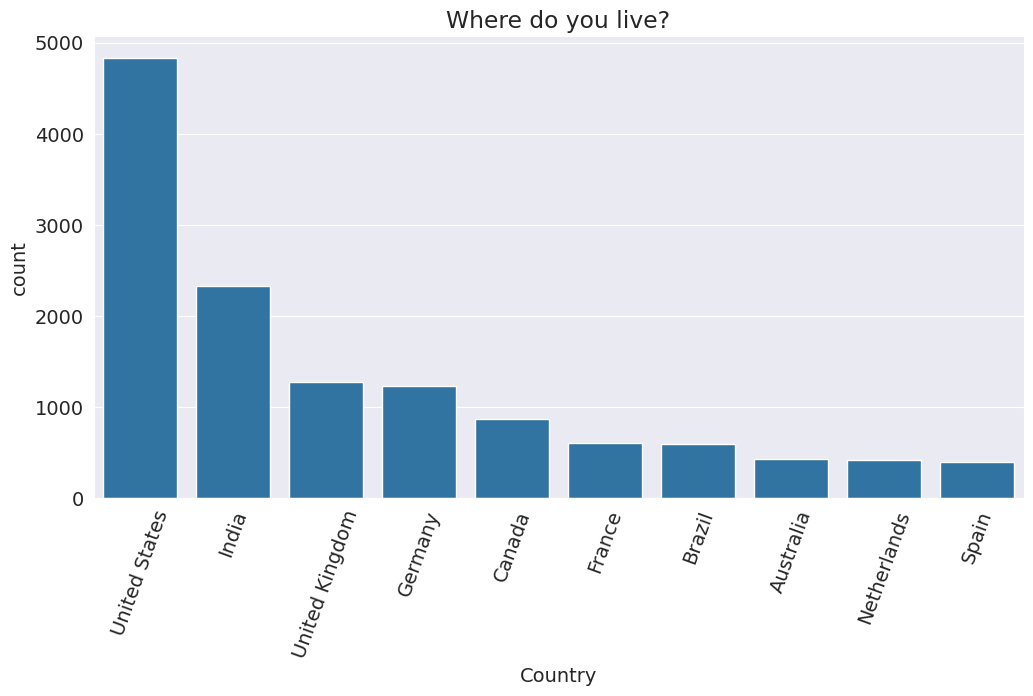

In [31]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=70)
sns.barplot(x=top_countries.index,y=top_countries)
plt.title(schema.Country);

It appears the that a disproportionately high number of respondents are from USA & India - which one might expect since these countries have the highest populations (apart from China), and since the Survey is in English, which is the common language used by professionals in US, India & UK. We can already see that the survey may not be representative of the entire programming community especially from non-English speaking countries.

**Age**

In [32]:
schema.Age

'What is your age (in years)? If you prefer not to answer, you may leave this question blank.'

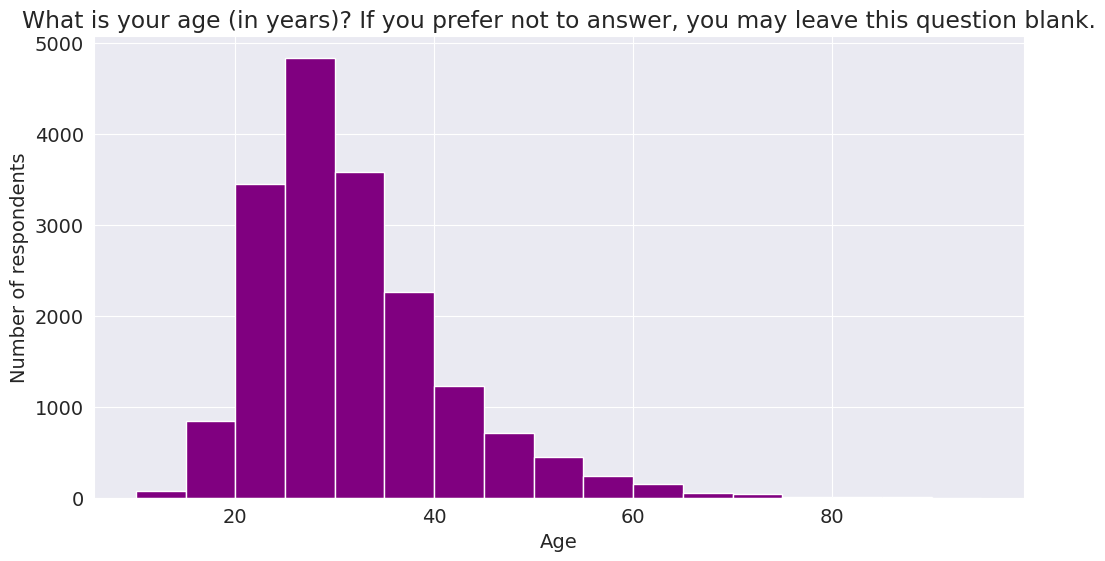

In [33]:
plt.figure(figsize=(12,6))
plt.hist(survey_df.Age, bins= np.arange(10,100,5) , color='purple')
plt.title(schema.Age);
plt.xlabel('Age');
plt.ylabel('Number of respondents');

It appears that large parcentage of respondents are in the range of 20-45, which is somewhat representative of programming community in general.

**Create an AgeGroup column by binning the Age column**

In [34]:
# Define age bins and labels
bins = [0, 10, 18, 30, 45, 60, float('inf')]
labels = ['Less than 10 years', '10-18 years', '18-30 years', '30-45 years', '45-60 years', 'Older than 60 years']

In [35]:
# Create AgeGroup column (this will leave NaN for missing ages)
survey_df['AgeGroup'] = pd.cut(survey_df['Age'], bins=bins, labels=labels, right=False)

In [36]:
# Add 'Unknown' as a category and fill NaNs with it
survey_df['AgeGroup'] = survey_df['AgeGroup'].cat.add_categories('Unknown').fillna('Unknown')

In [37]:
# Check the counts per group
print("Respondents per AgeGroup:\n")
survey_df['AgeGroup'].value_counts()

Respondents per AgeGroup:



,count
AgeGroup,
18-30 years,8794
30-45 years,7071
Unknown,2863
45-60 years,1410
10-18 years,404
Older than 60 years,268
Less than 10 years,0


In [38]:
survey_df.sample(10)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,...,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt,AgeGroup
958,Nigeria,NaN,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,18.0,12.0,10.0,Bash/Shell/PowerShell;C;C#;C++;HTML/CSS;Java;J...,...,Every few months,Meditate;Play games;Visit Stack Overflow;Go fo...,"Independent contractor, freelancer, or self-em...","Database administrator;Developer, back-end;Dev...",20.0,Very satisfied,"Languages, frameworks, and other technologies ...",Sometimes: 1-2 days per month but less than we...,Fairly important,Unknown
5825,Australia,35.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Web development or web design,No,17.0,17.0,15.0,HTML/CSS;JavaScript;PHP,...,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Designer;Developer, front-end;Marketing or sal...",38.0,Very satisfied,Flex time or a flexible schedule;Office enviro...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary,30-45 years
17014,United States,54.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,12.0,42.0,23.0,Bash/Shell/PowerShell;C#;Go;HTML/CSS;JavaScrip...,...,Every few months,Go for a walk or other physical activity;Do ot...,Employed full-time,"Developer, back-end;Developer, desktop or ente...",NaN,NaN,NaN,NaN,Very important,45-60 years
19669,United States,54.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,15.0,20.0,25.0,C#;JavaScript;Ruby;Swift,...,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, back-end;Developer, embedded applic...",45.0,Very satisfied,Flex time or a flexible schedule;Remote work o...,Sometimes: 1-2 days per month but less than we...,Very important,45-60 years
19883,Canada,20.0,Woman,Some college/university study without earning ...,Web development or web design,Yes,18.0,2.0,NaN,C#;HTML/CSS;Java;JavaScript;PHP;Python;SQL;Typ...,...,Every few months,Call a coworker or friend;Visit Stack Overflow...,Employed part-time,"Database administrator;Developer, back-end;Dev...",NaN,NaN,"Flex time or a flexible schedule;Languages, fr...",NaN,NaN,18-30 years
6744,Germany,41.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",No,16.0,20.0,11.0,Java;SQL,...,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed part-time,"Developer, back-end",32.0,NaN,Flex time or a flexible schedule;Remote work o...,Sometimes: 1-2 days per month but less than we...,Fairly important,30-45 years
1098,United Kingdom,28.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Information systems, information technology, o...",Yes,13.0,8.0,2.0,HTML/CSS;JavaScript;TypeScript,...,Once every few years,NaN,Employed full-time,"Developer, front-end",8.0,Very satisfied,Financial performance or funding status of the...,Never,Fairly important,18-30 years
11007,India,29.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,24.0,4.0,3.0,C++;Java;Objective-C;Swift,...,Every few months,Visit another developer community (please name):,Employed full-time,"Developer, front-end;Developer, mobile;Develop...",60.0,Very satisfied,"Languages, frameworks, and other technologies ...",Sometimes: 1-2 days per month but less than we...,Very important,18-30 years
20105,India,29.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,18.0,11.0,7.0,C#;HTML/CSS;JavaScript;SQL;TypeScript,...,Once every few years,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, back-end;Developer, desktop or ente...",60.0,Slightly dissatisfied,"Languages, frameworks, and other technologies

In [39]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20810 entries, 0 to 20857
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Country                 20706 non-null  object  
 1   Age                     17947 non-null  float64 
 2   Gender                  19764 non-null  object  
 3   EdLevel                 20191 non-null  object  
 4   UndergradMajor          18143 non-null  object  
 5   Hobbyist                20706 non-null  object  
 6   Age1stCode              20409 non-null  float64 
 7   YearsCode               20226 non-null  float64 
 8   YearsCodePro            16213 non-null  float64 
 9   LanguageWorkedWith      20450 non-null  object  
 10  LanguageDesireNextYear  19322 non-null  object  
 11  NEWLearn                19921 non-null  object  
 12  NEWStuck                20300 non-null  object  
 13  Employment              20626 non-null  object  
 14  DevType                 179

In [40]:
# Count number of respondents in each age group
age_group_counts = survey_df['AgeGroup'].value_counts().sort_index()

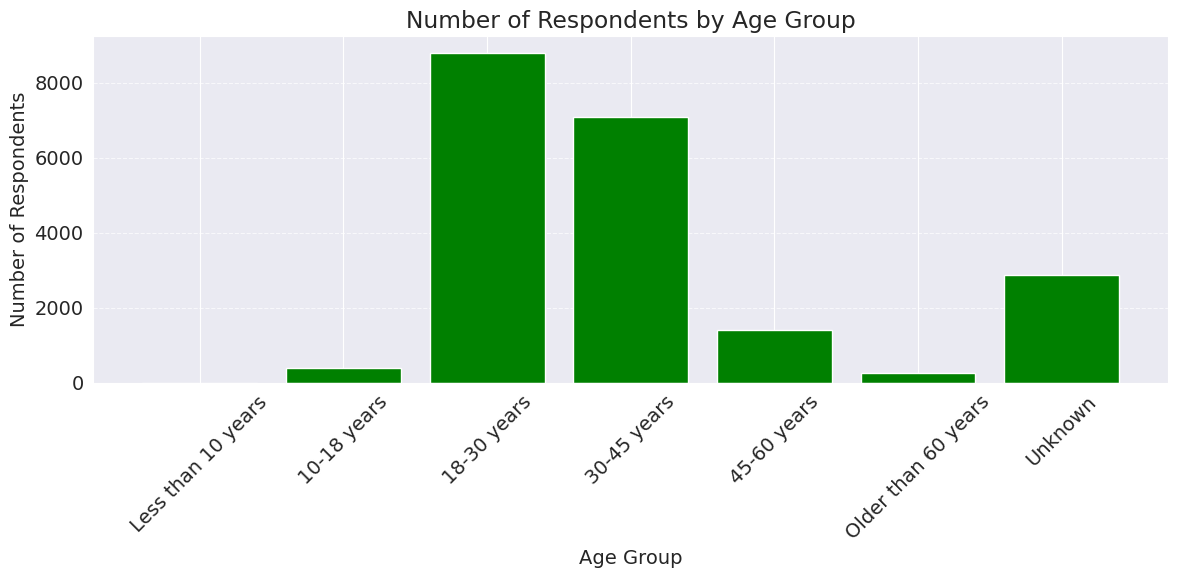

In [41]:
# Plot bar chart
plt.figure(figsize=(12, 6))
plt.bar(age_group_counts.index.astype(str), age_group_counts.values, color='green')
plt.title('Number of Respondents by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The bar chart above shows the distribution of survey respondents across different age groups. We observe that:

 --The 18–30 years and 30–45 years groups make up the majority of respondents, indicating that most Stack Overflow users are young to mid-career professionals.

 --The number of respondents in the 10–18 years and Older than 60 years groups is relatively low, suggesting that participation from younger students and older professionals is limited.

 --A noticeable number of responses fall into the "Unknown" age group, which may slightly affect the accuracy of age-related analyses. However, retaining this group ensures inclusiveness of the full dataset.

**Gender**

In [42]:
schema.Gender

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [43]:
gender_counts= survey_df.Gender.value_counts(dropna=False)
gender_counts

,count
Gender,
Man,18341
Woman,1294
NaN,1046
"Non-binary, genderqueer, or gender non-conforming",129


A pie chat would be a good way to visualize the distribution

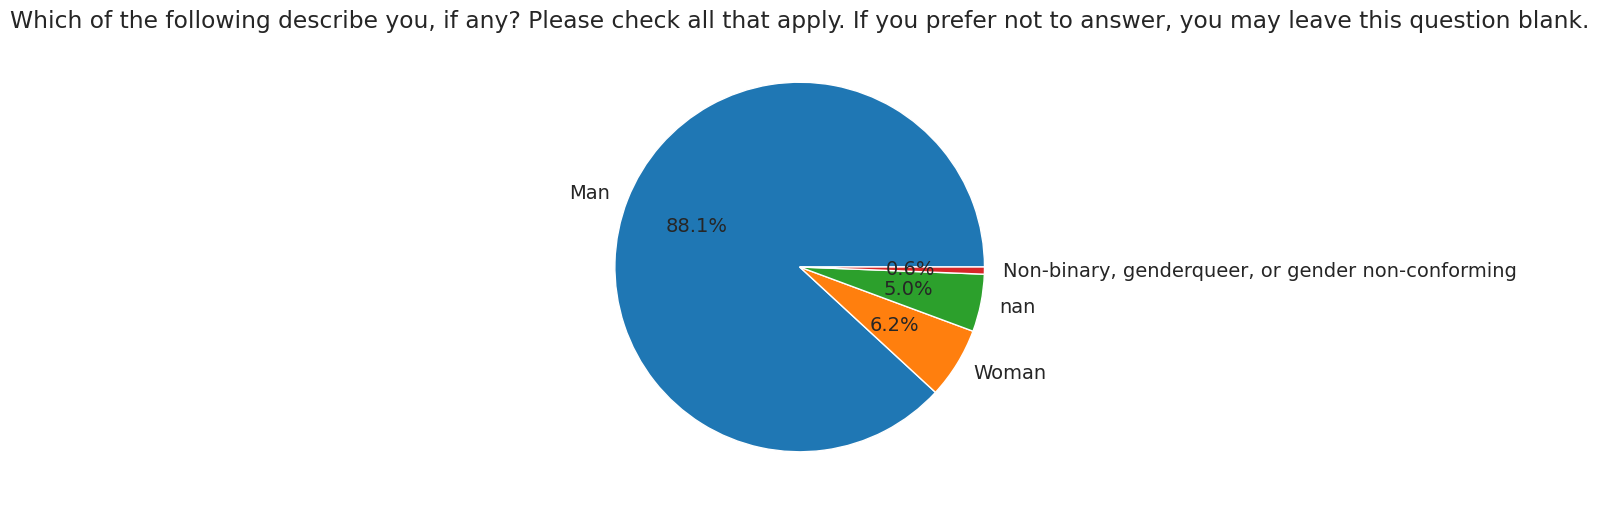

In [44]:
plt.figure(figsize=(12,6))
plt.pie(gender_counts,labels=gender_counts.index,autopct='%1.1f%%', startangle=0)
plt.title(schema.Gender);

Gender distribution of male and female with education level

In [45]:
# Filter only 'Man' and 'Woman' from Gender column
gender_filtered = survey_df[survey_df['Gender'].isin(['Man', 'Woman'])]

In [46]:
survey_df.head()

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,...,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt,AgeGroup
0,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13.0,36.0,27.0,C#;HTML/CSS;JavaScript,...,Once a year,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",50.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important,Unknown
1,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19.0,7.0,4.0,JavaScript;Swift,...,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,NaN,NaN,Fairly important,Unknown
2,Russian Federation,NaN,NaN,NaN,NaN,Yes,15.0,4.0,NaN,Objective-C;Python;Swift,...,Once a decade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
3,Albania,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18.0,7.0,4.0,NaN,...,Once a year,NaN,NaN,NaN,40.0,Slightly dissatisfied,Flex time or a flexible schedule;Office enviro...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary,18-30 years
4,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16.0,15.0,8.0,HTML/CSS;Ruby;SQL,...,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,NaN,NaN,NaN,NaN,NaN,Very important,30-45 years


In [47]:
survey_df.EdLevel.unique()
survey_df.EdLevel.value_counts()

,count
EdLevel,
"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9429
"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4617
Some college/university study without earning a degree,2548
"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",1567
"Associate degree (A.A., A.S., etc.)",699
"Other doctoral degree (Ph.D., Ed.D., etc.)",594
Primary/elementary school,298
"Professional degree (JD, MD, etc.)",294
I never completed any formal education,145


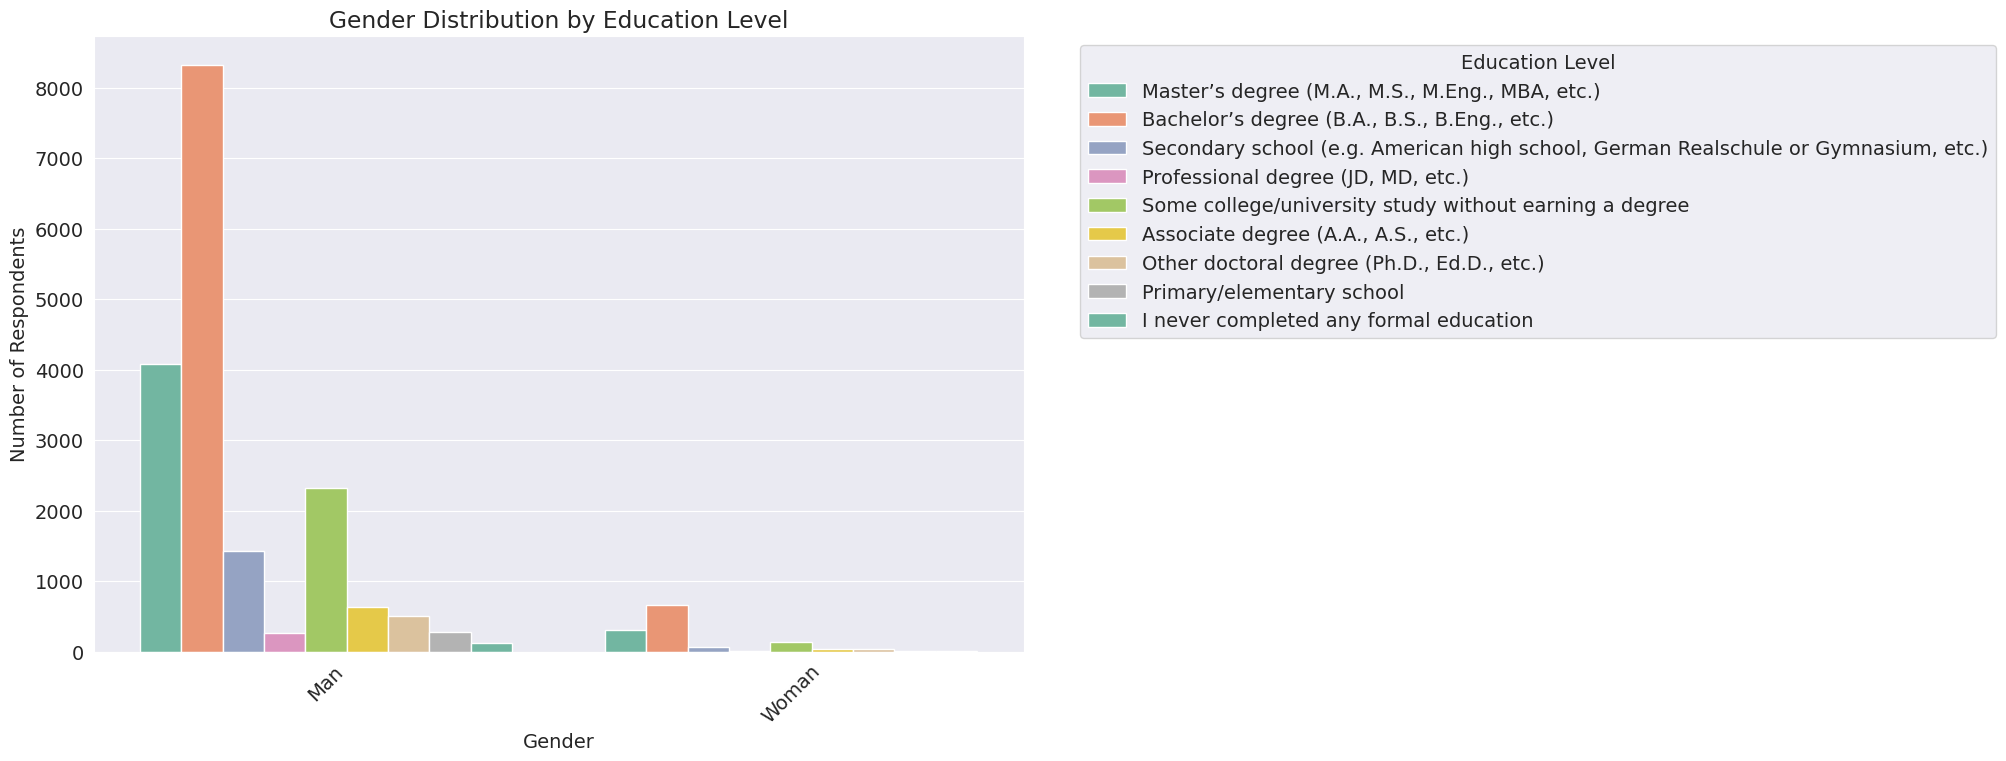

In [48]:
plt.figure(figsize=(12, 8))
# Barplot: x = Gender, hue = Education Level
sns.countplot(x='Gender', data=gender_filtered, hue='EdLevel', palette='Set2')
plt.title('Gender Distribution by Education Level');
plt.xlabel('Gender');
plt.ylabel('Number of Respondents');
plt.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left');
plt.xticks(rotation=45);


The bar chart shows the distribution of education levels among Men and Women respondents in the Stack Overflow 2020 survey.

Key observations:

  --A larger number of Men participated in the survey compared to Women, which reflects the known gender imbalance in the tech industry.

  --Among both genders, the most common education level is a Bachelor’s degree, followed by a Master’s degree.

  --A small number of respondents reported being self-taught or having no formal education.

**Education Level**

In [49]:
schema.EdLevel

'Which of the following best describes the highest level of formal education that you’ve completed?'

In [50]:
survey_df.EdLevel.unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)', nan,
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Professional degree (JD, MD, etc.)',
       'Some college/university study without earning a degree',
       'Associate degree (A.A., A.S., etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Primary/elementary school',
       'I never completed any formal education'], dtype=object)

<ipython-input-51-d2013c4e8b7f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(survey_df.EdLevel,palette='Set2');


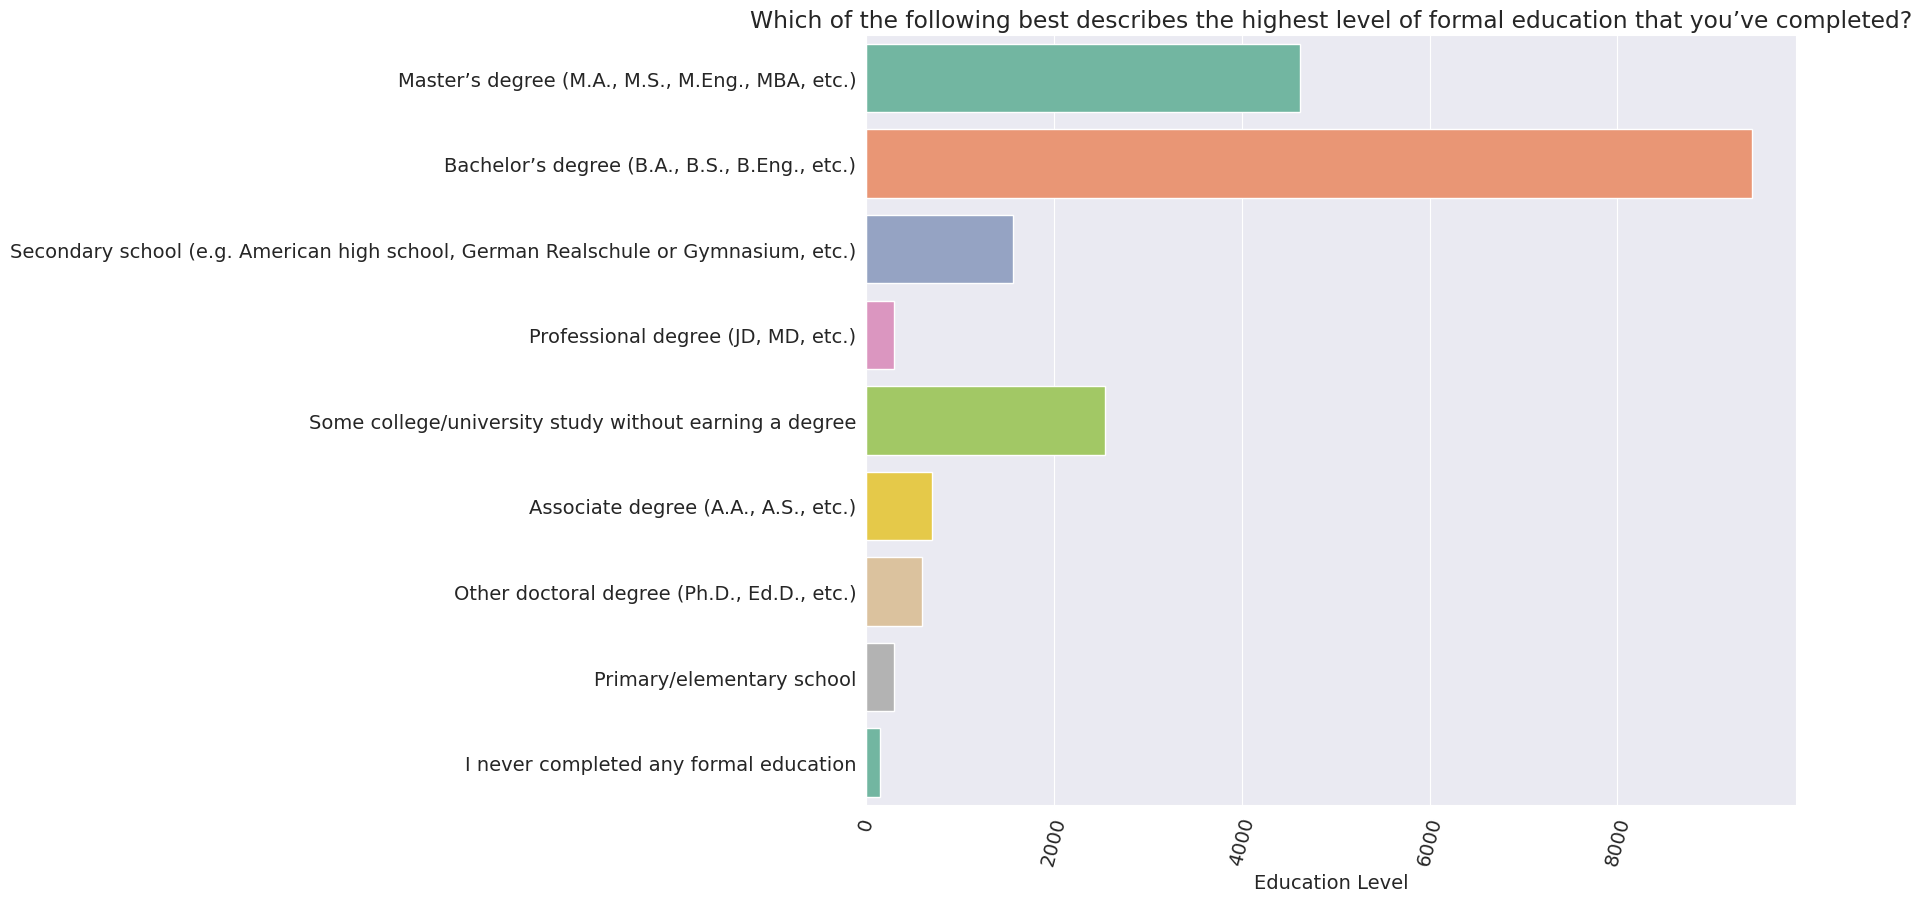

In [51]:
plt.figure(figsize=(12,10));
sns.countplot(survey_df.EdLevel,palette='Set2');
plt.title(schema.EdLevel);
plt.xticks(rotation=75);
plt.xlabel('Education Level');
plt.ylabel(None);

**Percentage of each education level**

In [52]:
# Calculate percentage of each education level
edu_counts = survey_df['EdLevel'].value_counts(normalize=True) * 100
edu_percent_df = edu_counts.reset_index()
edu_percent_df.columns = ['EdLevel', 'Percentage']

In [53]:
edu_percent_df

,EdLevel,Percentage
0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",46.699024
1,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",22.866624
2,Some college/university study without earning ...,12.619484
3,"Secondary school (e.g. American high school, G...",7.760884
4,"Associate degree (A.A., A.S., etc.)",3.461938
5,"Other doctoral degree (Ph.D., Ed.D., etc.)",2.941905
6,Primary/elementary school,1.475905
7,"Professional degree (JD, MD, etc.)",1.456094
8,I never completed any formal education,0.718142


<ipython-input-54-d187e24a1437>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='EdLevel', y='Percentage', data=edu_percent_df, palette='Set2')


Text(0, 0.5, 'Percentage of Respondents')

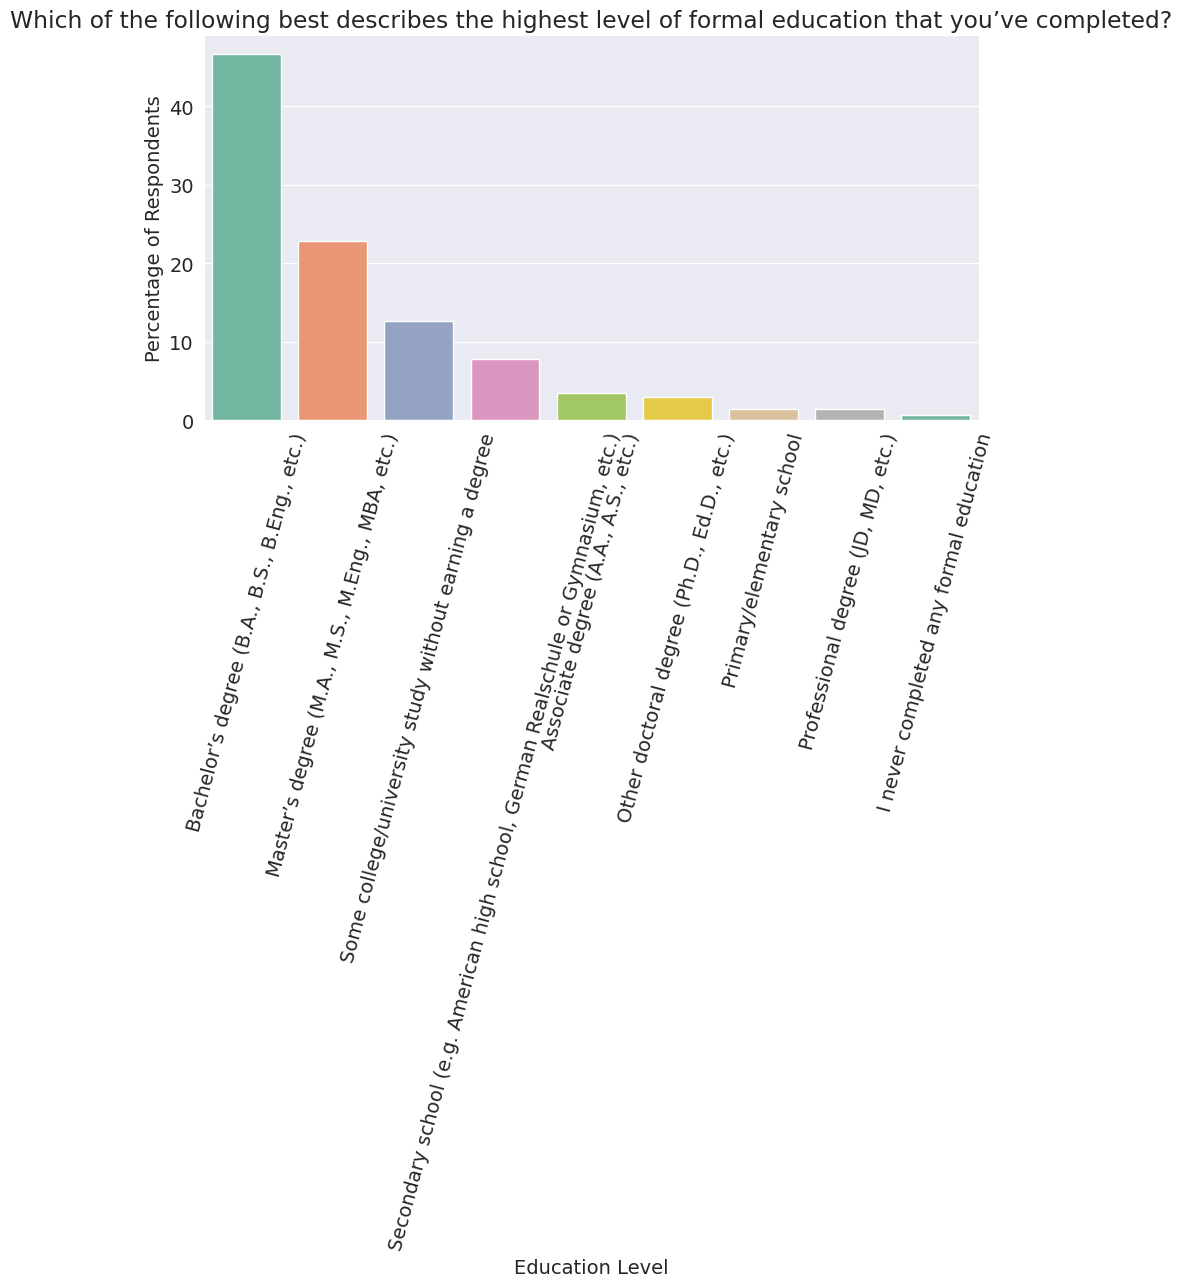

In [54]:
#  Plot as a barplot
plt.figure(figsize=(10, 5))
sns.barplot(x='EdLevel', y='Percentage', data=edu_percent_df, palette='Set2')
plt.title(schema.EdLevel)
plt.xticks(rotation=75)
plt.xlabel('Education Level')
plt.ylabel('Percentage of Respondents')

**Under Grade Major Persentage**

In [55]:
schema.UndergradMajor

'What was your primary field of study?'

In [56]:
survey_df.UndergradMajor.unique()

array(['Computer science, computer engineering, or software engineering',
       nan, 'Mathematics or statistics',
       'Another engineering discipline (such as civil, electrical, mechanical, etc.)',
       'A humanities discipline (such as literature, history, philosophy, etc.)',
       'A health science (such as nursing, pharmacy, radiology, etc.)',
       'Information systems, information technology, or system administration',
       'Web development or web design',
       'A natural science (such as biology, chemistry, physics, etc.)',
       'Fine arts or performing arts (such as graphic design, music, studio art, etc.)',
       'I never declared a major',
       'A social science (such as anthropology, psychology, political science, etc.)',
       'A business discipline (such as accounting, finance, marketing, etc.)'],
      dtype=object)

In [57]:
survey_df.UndergradMajor.value_counts()

,count
UndergradMajor,
"Computer science, computer engineering, or software engineering",11320
"Another engineering discipline (such as civil, electrical, mechanical, etc.)",1634
"Information systems, information technology, or system administration",1422
"A natural science (such as biology, chemistry, physics, etc.)",807
Mathematics or statistics,649
Web development or web design,586
"A business discipline (such as accounting, finance, marketing, etc.)",468
"A humanities discipline (such as literature, history, philosophy, etc.)",371
"A social science (such as anthropology, psychology, political science, etc.)",365


In [58]:
survey_df.UndergradMajor.value_counts(normalize=True)*100

,proportion
UndergradMajor,
"Computer science, computer engineering, or software engineering",62.393210
"Another engineering discipline (such as civil, electrical, mechanical, etc.)",9.006228
"Information systems, information technology, or system administration",7.837734
"A natural science (such as biology, chemistry, physics, etc.)",4.447996
Mathematics or statistics,3.577137
Web development or web design,3.229896
"A business discipline (such as accounting, finance, marketing, etc.)",2.579507
"A humanities discipline (such as literature, history, philosophy, etc.)",2.044866
"A social science (such as anthropology, psychology, political science, etc.)",2.011795


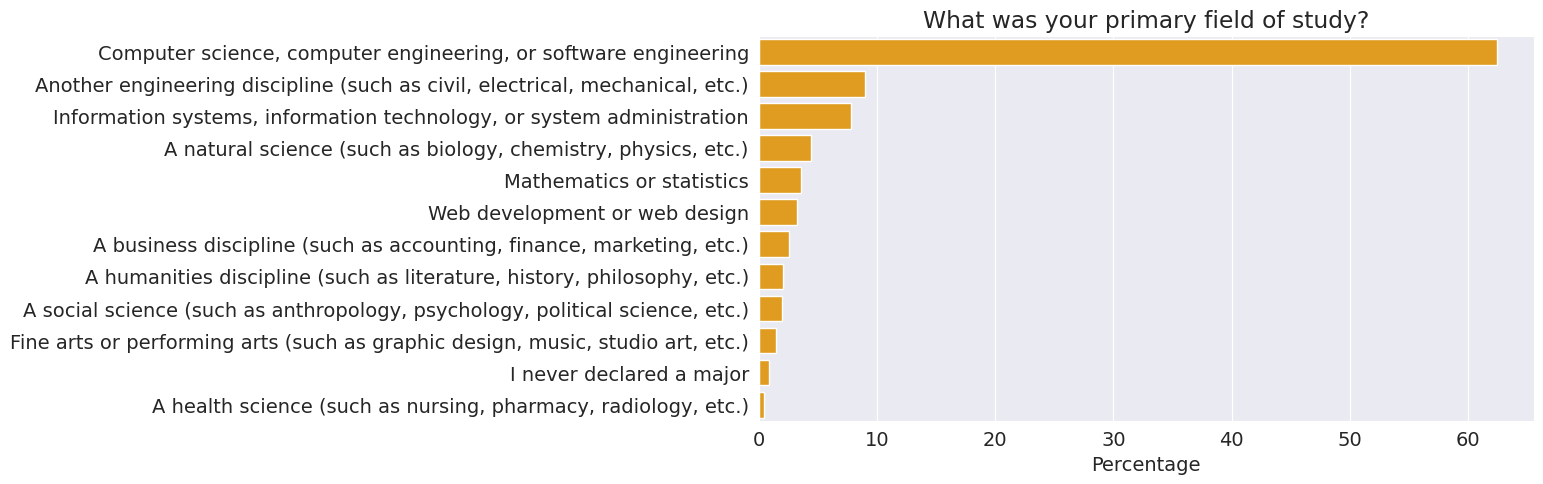

In [59]:
UnderGrad_per= survey_df.UndergradMajor.value_counts()*100/ survey_df.UndergradMajor.count()
sns.barplot(x=UnderGrad_per,y=UnderGrad_per.index, color='orange');
plt.title(schema.UndergradMajor)
plt.xlabel('Percentage');
plt.ylabel(None);

In [60]:
schema.NEWEdImpt

'How important is a formal education, such as a university degree in computer science, to your career?'

In [61]:
survey_df.NEWEdImpt.unique()

array(['Fairly important', nan, 'Not at all important/not necessary',
       'Very important', 'Somewhat important', 'Critically important'],
      dtype=object)

**whether a degree is considered important for learning programming**

In [62]:
# Calculate percentages for degree importance
degree_importance = survey_df['NEWEdImpt'].value_counts(normalize=True) * 100
degree_importance_df = degree_importance.reset_index()
degree_importance_df.columns = ['ImportanceLevel', 'Percentage']

<ipython-input-63-8e4d9d4e771f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Percentage', y='ImportanceLevel', data=degree_importance_df, palette='viridis')


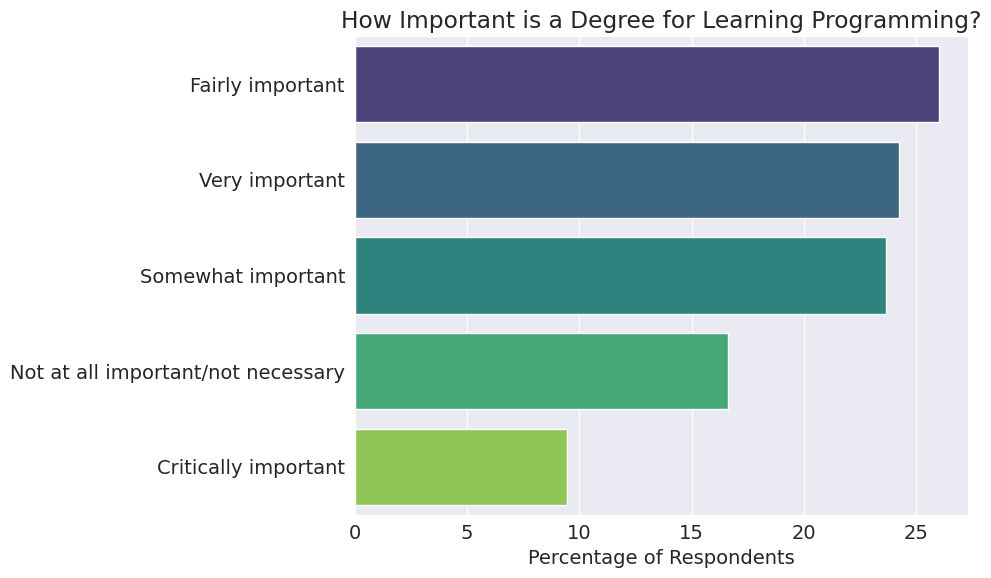

In [63]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Percentage', y='ImportanceLevel', data=degree_importance_df, palette='viridis')
plt.title('How Important is a Degree for Learning Programming?')
plt.xlabel('Percentage of Respondents')
plt.ylabel(None)
plt.tight_layout()
plt.show()

**Employment**

In [64]:
schema.Employment

'Which of the following best describes your current employment status?'

In [65]:
survey_df.Employment.unique()

array(['Independent contractor, freelancer, or self-employed',
       'Employed full-time', nan, 'Student',
       'Not employed, but looking for work', 'Employed part-time',
       'Retired', 'Not employed, and not looking for work'], dtype=object)

In [66]:
survey_df.Employment.value_counts()

,count
Employment,
Employed full-time,15106
Student,2159
"Independent contractor, freelancer, or self-employed",1870
"Not employed, but looking for work",678
Employed part-time,625
"Not employed, and not looking for work",98
Retired,90


In [67]:
employment_per= survey_df.Employment.value_counts()*100/ survey_df.Employment.count()
employment_per

,count
Employment,
Employed full-time,73.237661
Student,10.467371
"Independent contractor, freelancer, or self-employed",9.066227
"Not employed, but looking for work",3.287113
Employed part-time,3.030156
"Not employed, and not looking for work",0.475128
Retired,0.436342


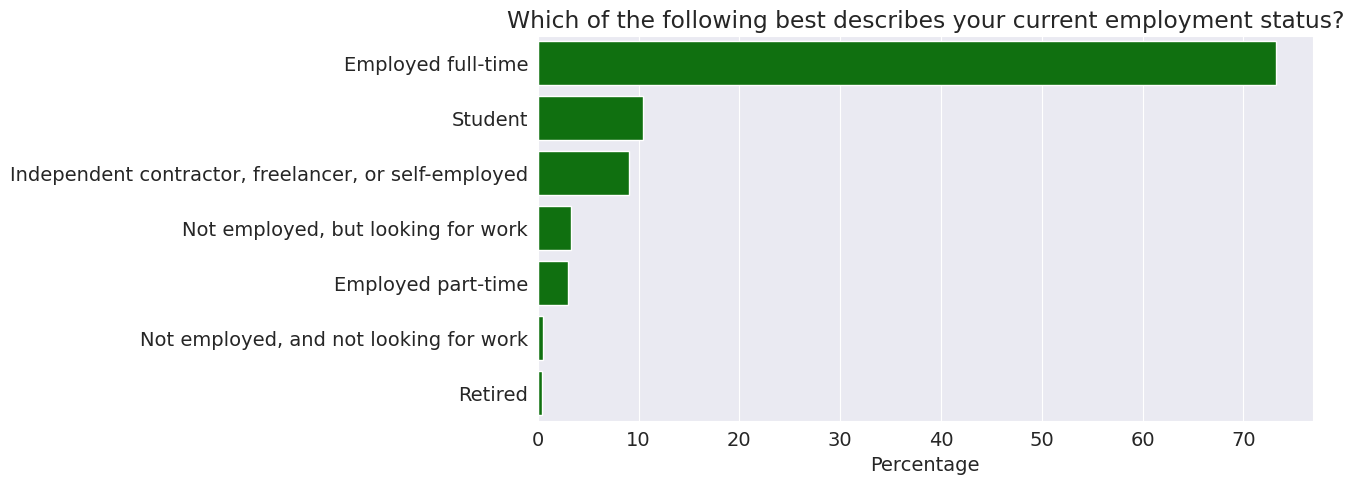

In [68]:
employment_per= survey_df.Employment.value_counts()*100/ survey_df.Employment.count()
sns.barplot(x=employment_per,y=employment_per.index, color='green');
plt.title(schema.Employment)
plt.xlabel('Percentage');
plt.ylabel(None);

In [69]:
schema.DevType

'Which of the following describe you? Please select all that apply.'

In [70]:
survey_df.DevType.unique()

array(['Developer, desktop or enterprise applications;Developer, full-stack',
       'Developer, full-stack;Developer, mobile', nan, ...,
       'Developer, back-end;Developer, desktop or enterprise applications;Developer, front-end;Developer, full-stack;Engineering manager;Product manager',
       'Data or business analyst;Developer, back-end;Developer, front-end;Educator',
       'Developer, back-end;Developer, desktop or enterprise applications;Developer, full-stack;Developer, mobile;DevOps specialist;System administrator'],
      dtype=object)

In [71]:
survey_df.DevType.value_counts()

,count
DevType,
"Developer, full-stack",1617
"Developer, back-end",1032
"Developer, back-end;Developer, front-end;Developer, full-stack",831
"Developer, back-end;Developer, full-stack",534
"Developer, mobile",509
...,...
"Academic researcher;Data or business analyst;Data scientist or machine learning specialist;Developer, back-end;Developer, front-end;Developer, full-stack;DevOps specialist;Educator;Product manager;Scientist;Senior executive/VP;System administrator",1
"Designer;Developer, back-end;Developer, QA or test;DevOps specialist;Educator",1
"Data or business analyst;Developer, desktop or enterprise applications;Developer, front-end;Developer, mobile;DevOps specialist;Engineering manager",1


In [72]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()  # Start with the original column as a DataFrame
    options = []  # List to store all unique options

    # Iterate over each non-null row
    for idx, value in col_series[col_series.notnull()].items():
        for option in value.split(';'):  # Split the semicolon-separated string
            option = option.strip()  # Remove extra spaces
            if option not in result_df.columns:
                options.append(option)
                result_df[option] = False  # Initialize column with False values
            result_df.at[idx, option] = True  # Mark the option True for this row

    return result_df[options]  # Return only the new binary columns


In [73]:
survey_df['DevType'][0] = "Developer, front-end;Developer, back-end"

<ipython-input-73-3a6e22b0ee15>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  survey_df['DevType'][0] = "Developer, front-end;Developer, back-end"
<ipython-input-73-3a6e22b0ee15>:1: SettingWithCopyWarning: 
A value is trying to be set on 

In [74]:
dev_type_df = split_multicolumn(survey_df.DevType)

In [75]:
dev_type_df

,"Developer, front-end","Developer, back-end","Developer, full-stack","Developer, mobile",Designer,"Developer, QA or test",DevOps specialist,"Developer, desktop or enterprise applications","Developer, game or graphics",Database administrator,...,System administrator,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional
0,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20853,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20854,False,True,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20855,False,True,True,True,False,False,True,True,False,False,...,True,False,False,False,False,False,False,False,False,False
20856,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [76]:
dev_type_totals= dev_type_df.sum().sort_values(ascending=False)
dev_type_totals

,0
"Developer, full-stack",10035
"Developer, back-end",9998
"Developer, front-end",6799
"Developer, desktop or enterprise applications",4296
"Developer, mobile",3602
DevOps specialist,2281
Database administrator,2192
Designer,1941
System administrator,1908
"Developer, embedded applications or devices",1652


 Percentage of Respondents Working in Data Science Roles

In [77]:
# Select relevant columns from dev_type_df
data_roles = [
    'Data scientist or machine learning specialist',
    'Data or business analyst',
    'Scientist',
    'Engineer, site reliability'
]

In [78]:
# Count how many respondents have at least one data science role
is_data_role = dev_type_df[data_roles].any(axis=1)
percent_data_roles = is_data_role.sum() * 100 / len(survey_df)

print(f"Percentage of respondents in data science roles: {percent_data_roles:.2f}%")

Percentage of respondents in data science roles: 16.08%


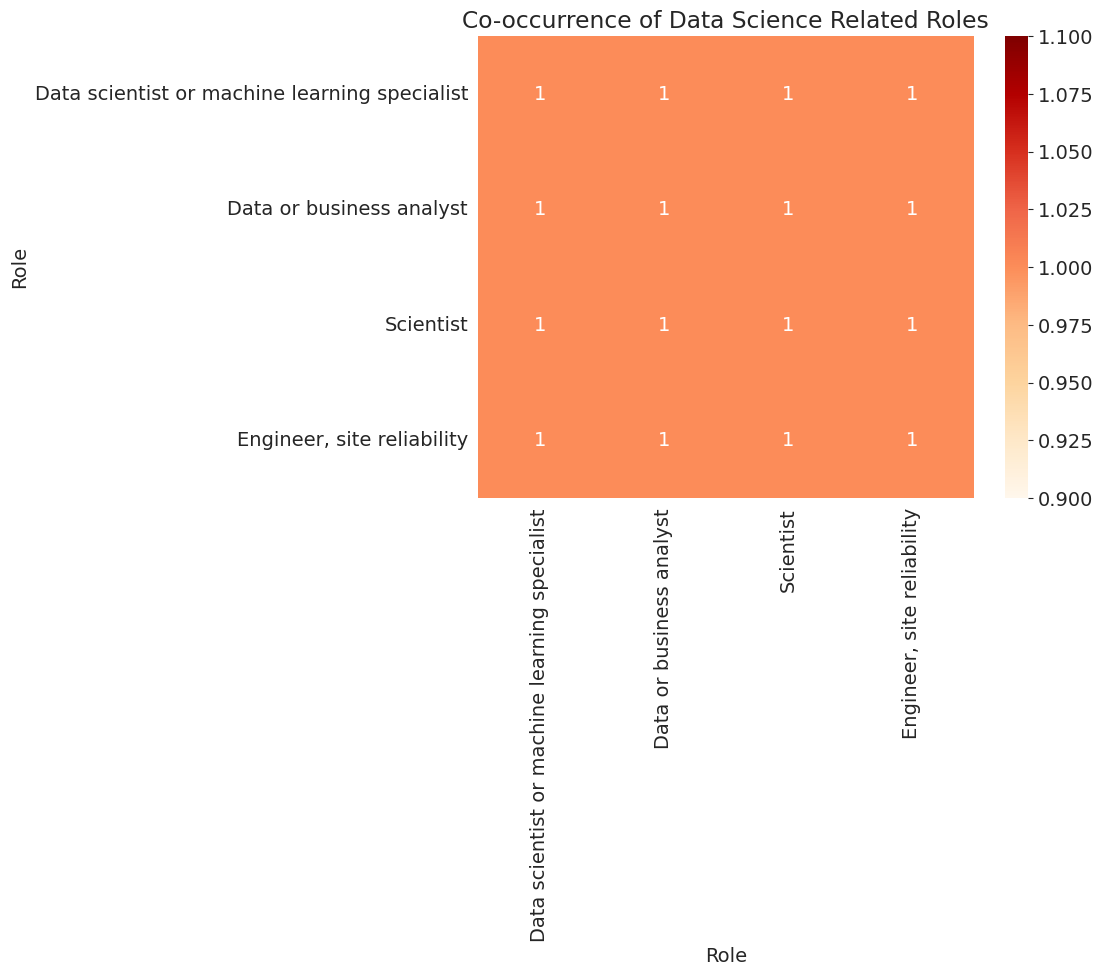

In [79]:
# Step 2: Create a co-occurrence matrix
co_occurrence = dev_type_df[data_roles].T.dot(dev_type_df[data_roles])

# Step 3: Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(co_occurrence, annot=True, fmt='d', cmap='OrRd')
plt.title('Co-occurrence of Data Science Related Roles')
plt.xlabel('Role')
plt.ylabel('Role')
plt.show()

<ipython-input-80-e3bca27e47bb>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=role_counts.values, y=role_counts.index, palette=('OrRd'))


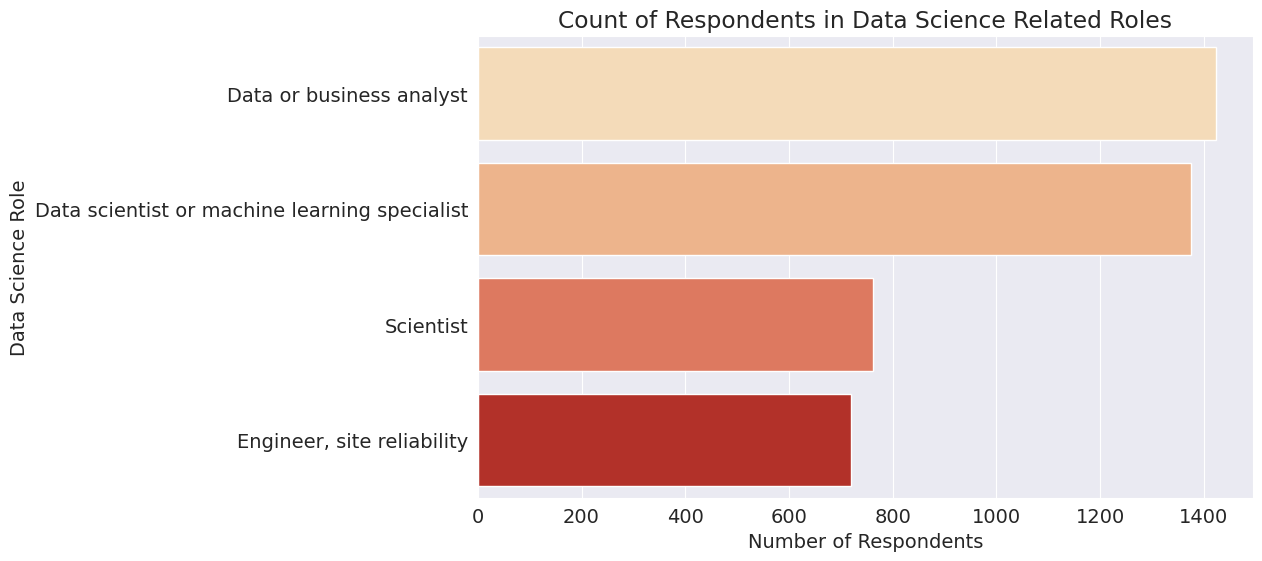

In [80]:
# Sum the number of respondents in each role
role_counts = dev_type_df[data_roles].sum().sort_values(ascending=False)

# Plot using seaborn barplot
plt.figure(figsize=(10,6))
sns.barplot(x=role_counts.values, y=role_counts.index, palette=('OrRd'))

plt.title('Count of Respondents in Data Science Related Roles')
plt.xlabel('Number of Respondents')
plt.ylabel('Data Science Role')
plt.show()

Which Role Has the Highest Percentage of Women

In [81]:
# Filter for known gender values
gender_df = survey_df[['Gender']].copy()
gender_df = gender_df[gender_df['Gender'].isin(['Man', 'Woman'])]


In [82]:
#Join gender with role data
gender_role_df = gender_df.join(dev_type_df)
gender_role_df.sample(10)

,Gender,"Developer, front-end","Developer, back-end","Developer, full-stack","Developer, mobile",Designer,"Developer, QA or test",DevOps specialist,"Developer, desktop or enterprise applications","Developer, game or graphics",...,System administrator,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional
19391,Man,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10100,Man,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
16675,Man,True,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15444,Man,False,False,True,False,False,False,False,False,False,...,True,False,True,True,False,True,False,False,False,False
3566,Man,True,True,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
12437,Man,False,True,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
16652,Man,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20849,Man,True,True,True,False,False,False,False,True,False,...,False,True,True,False,False,False,False,False,False,False
19465,Man,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3572,Man,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [83]:
#  Calculate percentage of women in each role
percent_women_by_role = {}

for role in dev_type_df.columns:
    role_group = gender_role_df[gender_role_df[role] == True]
    if len(role_group) > 0:
        women_percent = (role_group['Gender'] == 'Woman').sum() * 100 / len(role_group)
        percent_women_by_role[role] = women_percent


In [84]:
#Identify the role with highest % of women
max_women_role = max(percent_women_by_role, key=percent_women_by_role.get)
print(f"Role with highest percentage of women: {max_women_role} ({percent_women_by_role[max_women_role]:.2f}%)")

Role with highest percentage of women: Marketing or sales professional (8.42%)


horizontal lollipop chart

In [85]:
# Data prep
women_percent_df = pd.DataFrame.from_dict(percent_women_by_role, orient='index', columns=['Percentage'])
women_percent_df = women_percent_df.sort_values('Percentage', ascending=True)

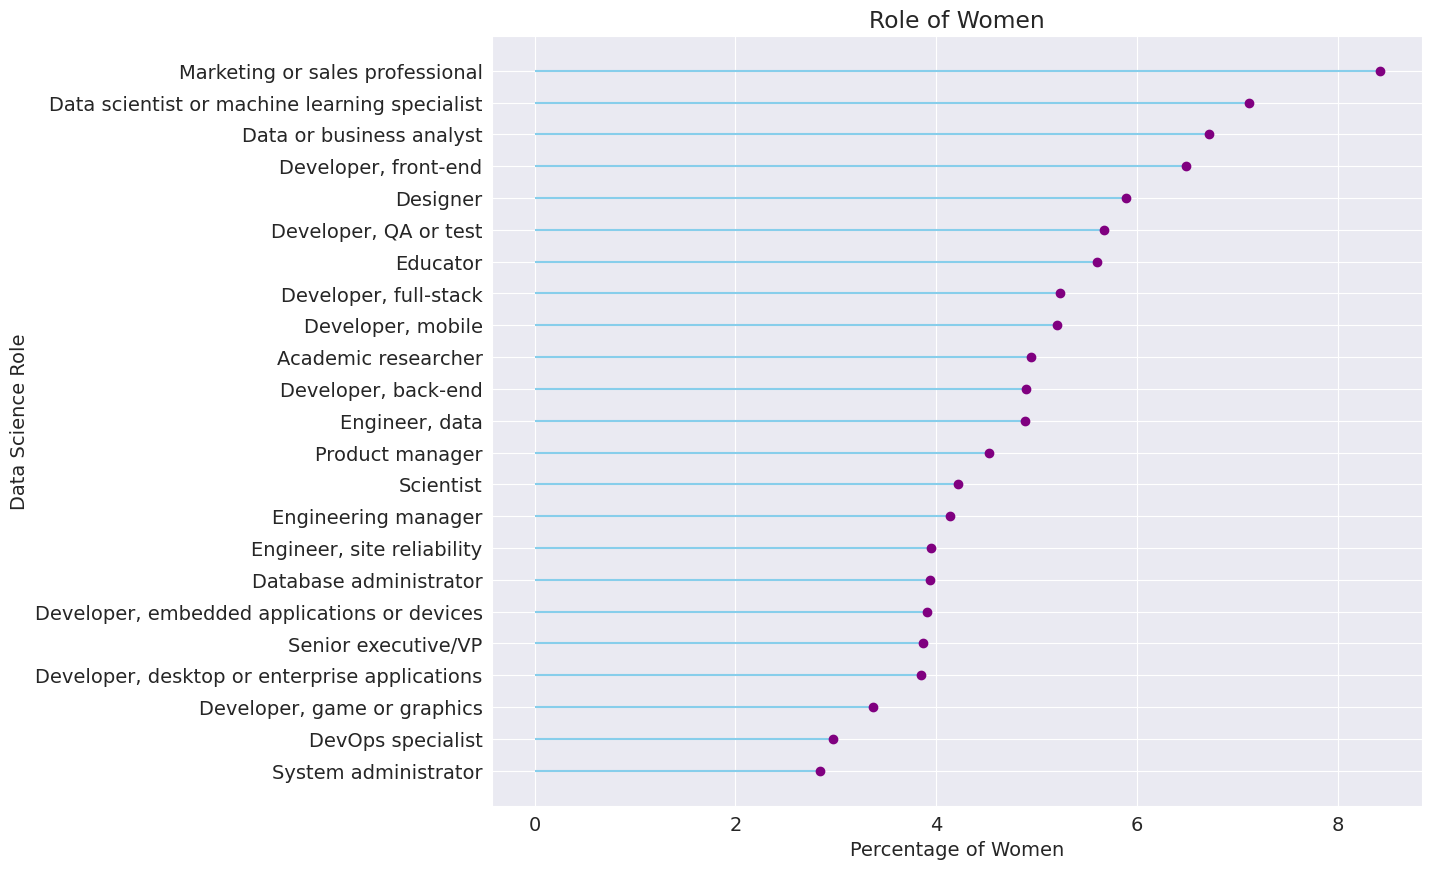

In [86]:
# Lollipop Chart
plt.figure(figsize=(12, 10))
plt.hlines(y=women_percent_df.index, xmin=0, xmax=women_percent_df['Percentage'], color='skyblue');
plt.plot(women_percent_df['Percentage'], women_percent_df.index, "o", color='purple');
plt.xlabel('Percentage of Women');
plt.ylabel('Data Science Role');
plt.title('Role of Women');

The lollipop chart above shows the proportion of women working in each developer role from the Stack Overflow 2020 survey. Each line represents a role, and the dot marks the percentage of respondents who identify as women in that role.

This visualization helps highlight disparities in gender representation across roles. For example, roles like Marketing or sales professional, data show higher female participation, while traditionally technical roles such as System administrator or DevOps specialist to have lower representation.

# Asking and Answering Questions

**Which were the most popular language in 2020?**

In [87]:
schema.LanguageWorkedWith

'Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

In [88]:
schema.LanguageDesireNextYear

'Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

In [89]:
survey_df.LanguageWorkedWith

,LanguageWorkedWith
0,C#;HTML/CSS;JavaScript
1,JavaScript;Swift
2,Objective-C;Python;Swift
3,NaN
4,HTML/CSS;Ruby;SQL
...,...
20853,Java;JavaScript;PHP;Python
20854,C;C#;Dart;HTML/CSS;Java;JavaScript;PHP;SQL
20855,C#;HTML/CSS;JavaScript;SQL;TypeScript
20856,Assembly;C;C#;C++;HTML/CSS;Java;JavaScript;PHP...


In [90]:
Language_df = split_multicolumn(survey_df.LanguageWorkedWith)
Language_df

,C#,HTML/CSS,JavaScript,Swift,Objective-C,Python,Ruby,SQL,Java,PHP,...,VBA,Perl,Scala,C++,Go,Haskell,Rust,Dart,Julia,Assembly
0,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20853,False,False,True,False,False,True,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
20854,True,True,True,False,False,False,False,True,True,True,...,False,False,False,False,False,False,False,True,False,False
20855,True,True,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
20856,True,True,True,False,False,False,False,True,True,True,...,False,False,False,True,False,False,False,False,False,True


There is 25 languages that people worked with.

In [91]:
language_worked_persentage= Language_df.mean().sort_values(ascending=False)*100
language_worked_persentage

,0
JavaScript,67.703027
HTML/CSS,62.268140
SQL,54.762134
Python,42.710235
Java,39.495435
Bash/Shell/PowerShell,33.286881
C#,32.244113
TypeScript,26.054781
PHP,25.136953
C++,21.922153


we can plot this information using horizontal bar chart.

<ipython-input-92-be666200c588>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=language_worked_persentage.values,y=language_worked_persentage.index,palette=('Set2'));


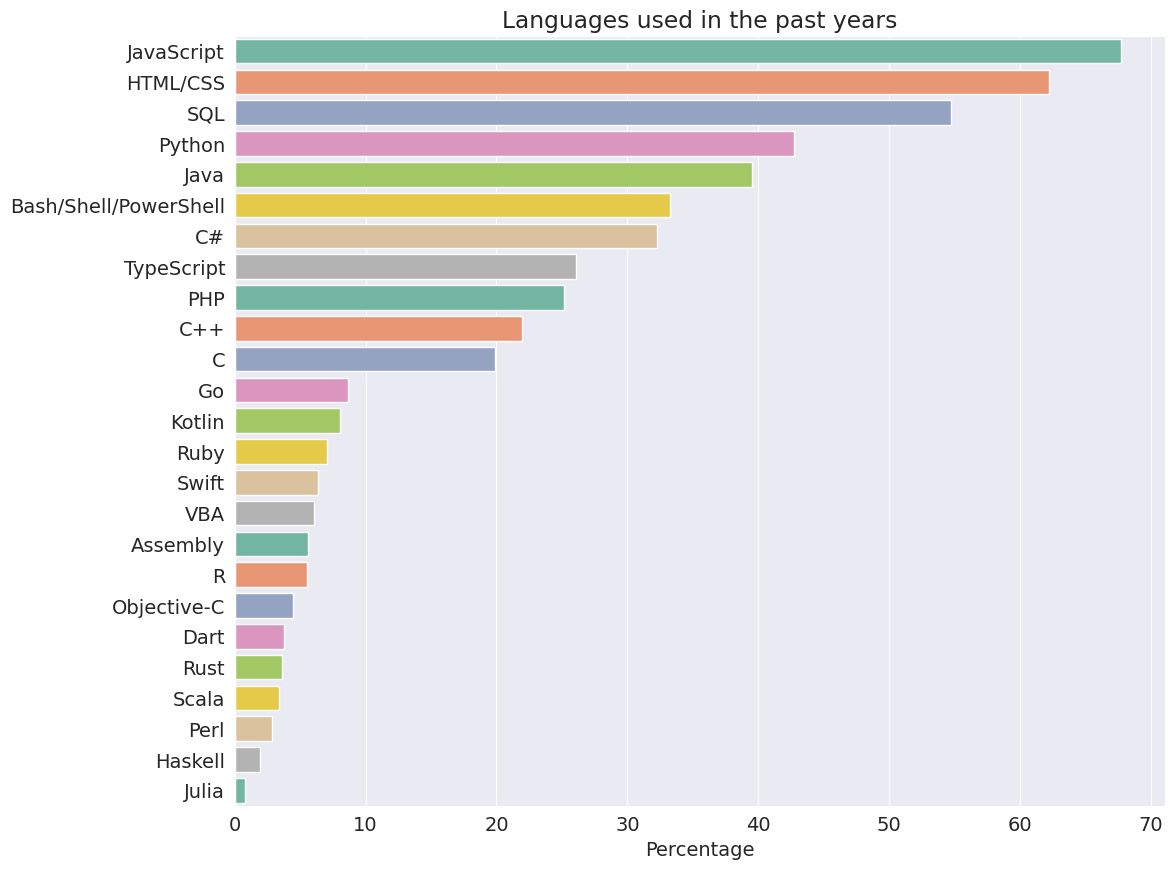

In [92]:
plt.figure(figsize=(12,10));
sns.barplot(x=language_worked_persentage.values,y=language_worked_persentage.index,palette=('Set2'));
plt.title('Languages used in the past years');
plt.xlabel('Percentage');
plt.ylabel(None);

Here Javascript,HTML/CSS comes out at the top as web development.

**Which languages are the most people intersted to learn over the next year?**

In [93]:
language_interested_next_year_df = split_multicolumn(survey_df.LanguageDesireNextYear)
language_interested_next_year_df

,C#,HTML/CSS,JavaScript,Python,Swift,Objective-C,Java,Ruby,Scala,PHP,...,Assembly,Bash/Shell/PowerShell,C,Haskell,Perl,C++,Julia,Kotlin,Dart,VBA
0,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20853,False,False,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20854,False,True,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
20855,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20856,False,False,False,False,True,True,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [94]:
language_interested_persentage= language_interested_next_year_df.mean().sort_values(ascending=False)*100
language_interested_persentage

,0
JavaScript,45.454109
Python,44.512254
HTML/CSS,36.381547
SQL,35.160980
TypeScript,30.115329
C#,25.012013
Java,22.421913
Go,21.763575
Bash/Shell/PowerShell,20.451706
Rust,17.419510


<ipython-input-95-6981db8a04a4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=language_interested_persentage.values,y=language_interested_persentage.index,palette=('viridis'));


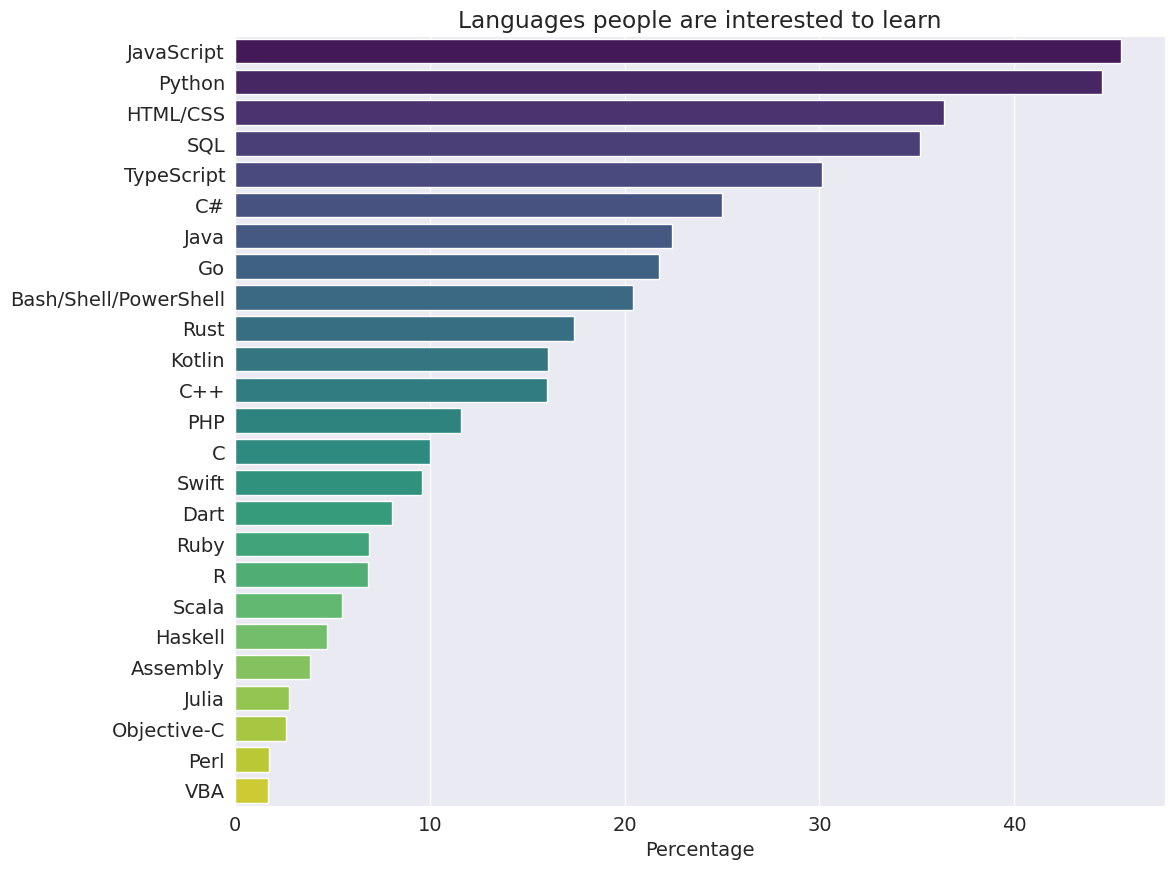

In [95]:
plt.figure(figsize=(12,10));
sns.barplot(x=language_interested_persentage.values,y=language_interested_persentage.index,palette=('viridis'));
plt.title('Languages people are interested to learn');
plt.xlabel('Percentage');
plt.ylabel(None);

The Python language that people are interested to learn in next years

**Q. Which are the most loved languages i.e. a high percentages of people who have used the language want to continue learning & using it over the next year?**

In [96]:
Language_df

,C#,HTML/CSS,JavaScript,Swift,Objective-C,Python,Ruby,SQL,Java,PHP,...,VBA,Perl,Scala,C++,Go,Haskell,Rust,Dart,Julia,Assembly
0,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20853,False,False,True,False,False,True,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
20854,True,True,True,False,False,False,False,True,True,True,...,False,False,False,False,False,False,False,True,False,False
20855,True,True,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
20856,True,True,True,False,False,False,False,True,True,True,...,False,False,False,True,False,False,False,False,False,True


In [97]:
# Logical AND to find where both are True
loved_lang_df = Language_df & language_interested_next_year_df
loved_lang_df

,Assembly,Bash/Shell/PowerShell,C,C#,C++,Dart,Go,HTML/CSS,Haskell,Java,...,Perl,Python,R,Ruby,Rust,SQL,Scala,Swift,TypeScript,VBA
0,False,False,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20853,False,False,False,False,False,False,False,False,False,True,...,False,True,False,False,False,False,False,False,False,False
20854,False,False,False,False,False,True,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
20855,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20856,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [98]:
# Sum across rows to get total "loved" count per language
loved_counts = loved_lang_df.sum().sort_values(ascending=False)

# Show top 10 loved languages (optional)
loved_counts.head(10)

,0
JavaScript,8357
HTML/CSS,7109
SQL,6648
Python,5933
C#,4206
Bash/Shell/PowerShell,3775
TypeScript,3701
Java,3680
C++,2036
PHP,1968


In [99]:
language_loved_persentage = (loved_lang_df.sum() * 100 / loved_lang_df.count()).sort_values(ascending=False)
language_loved_persentage


,0
JavaScript,40.158578
HTML/CSS,34.161461
SQL,31.946180
Python,28.510332
C#,20.211437
Bash/Shell/PowerShell,18.140317
TypeScript,17.784719
Java,17.683806
C++,9.783758
PHP,9.456992


<ipython-input-100-999e5a6f5d38>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=language_loved_persentage.values,y=language_loved_persentage.index,palette=('Set2'));


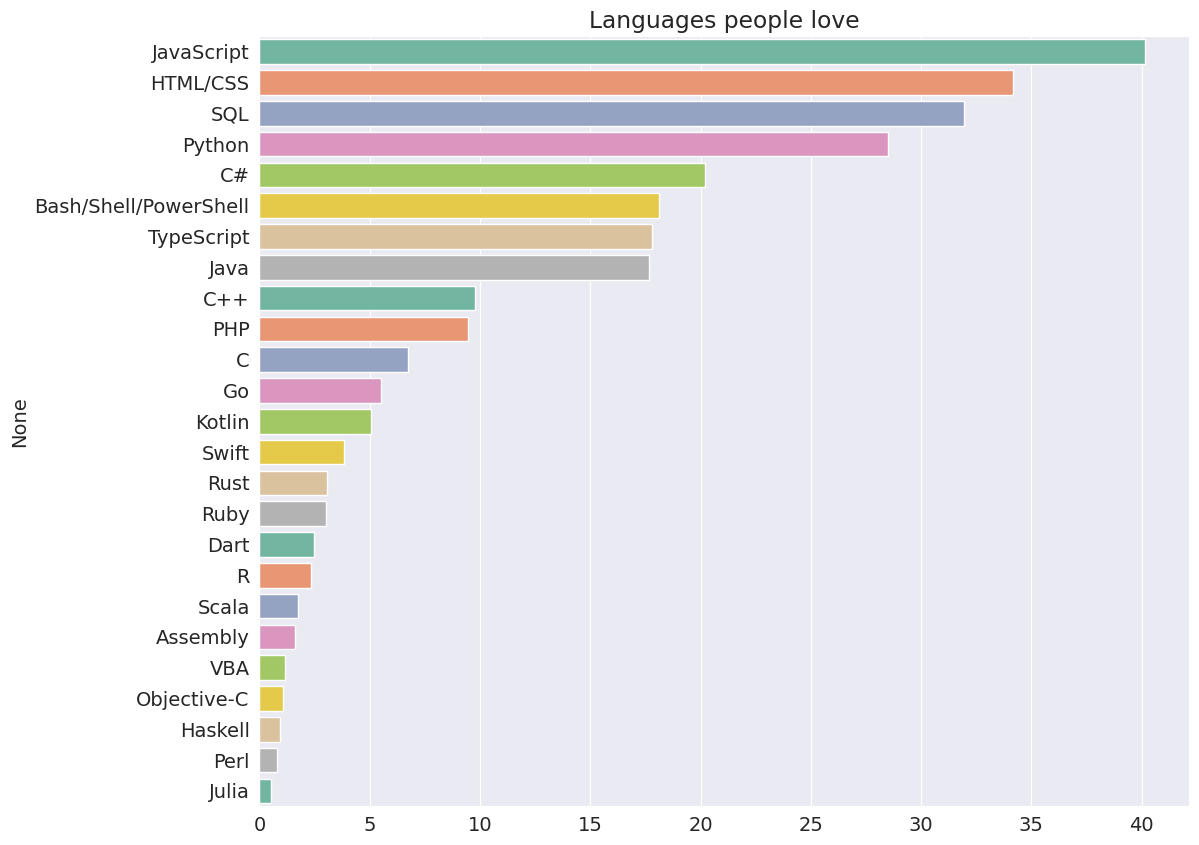

In [100]:
plt.figure(figsize=(12,10));
sns.barplot(x=language_loved_persentage.values,y=language_loved_persentage.index,palette=('Set2'));
plt.title('Languages people love');

**Q: In which countries do developers work the highest number of hours per week? Consider countries with more than 250 responses only.**

In [102]:
survey_df.groupby('Country')[['WorkWeekHrs','Age']].mean()

,WorkWeekHrs,Age
Country,,
Afghanistan,59.500000,24.250000
Albania,45.000000,28.777778
Algeria,29.142857,28.153846
Andorra,40.000000,51.000000
Antigua and Barbuda,NaN,NaN
...,...,...
"Venezuela, Bolivarian Republic of...",46.416667,28.315789
Viet Nam,39.122449,27.323077
Yemen,NaN,27.000000


In [105]:
country_df= survey_df.groupby('Country')['WorkWeekHrs'].mean().sort_values(ascending=False)
country_df

,WorkWeekHrs
Country,
Kuwait,66.00
Iraq,62.50
Haiti,60.00
Afghanistan,59.50
United Republic of Tanzania,51.75
...,...
Niger,NaN
Saint Vincent and the Grenadines,NaN
Sierra Leone,NaN


In [106]:
high_response_countries= country_df.loc[survey_df.Country.value_counts() >250].head(15)
high_response_countries

,WorkWeekHrs
Country,
United States,41.750672
Turkey,40.739362
India,40.400986
Canada,40.167922
Australia,40.072485
Poland,39.766773
Russian Federation,39.397887
Spain,39.235736
Italy,39.204082


**Q: How important is it to start young to build a career in programming?**

Let's create a scatter plot of Age Vs YearsCodePro (years of coding experience) to answer this question.

In [107]:
schema.YearsCodePro

'NOT including education, how many years have you coded professionally (as a part of your work)?'

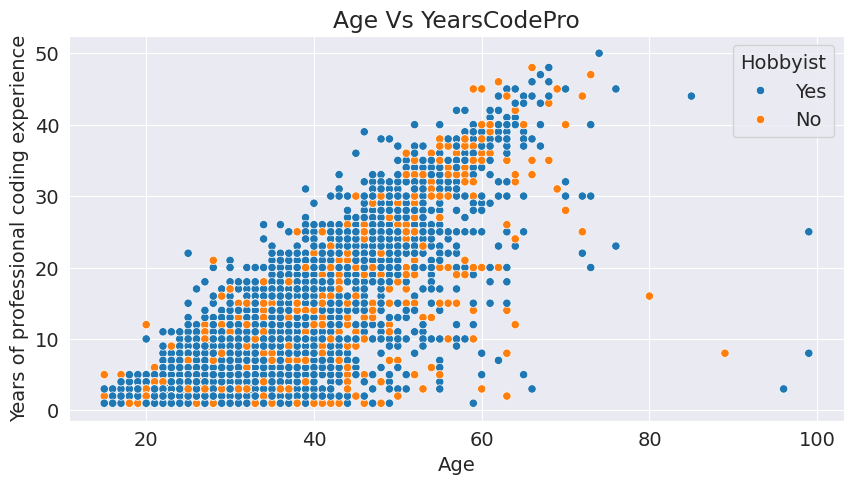

In [111]:
sns.scatterplot(x= 'Age', y='YearsCodePro',hue='Hobbyist', data=survey_df);
plt.title('Age Vs YearsCodePro');
plt.xlabel('Age');
plt.ylabel('Years of professional coding experience');


### 📊 Inferences and Conclusions from the Stack Overflow 2020 Survey

After analyzing the 2020 Stack Overflow Developer Survey, several key insights have emerged about the global programming community:

1. **Diversity & Representation**
   The survey reflects a broad overview of the global developer community, but with noticeable underrepresentation from non-English-speaking countries and individuals identifying as women or non-binary. While diversity is improving, there is still a need for greater inclusion and support for underrepresented groups across age, gender, geography, and background.

2. **Educational Background**
   The majority of developers hold a college degree; however, a significant number did not major in computer science. This highlights that a formal computer science degree is not essential to learn programming or to pursue a successful career in the tech industry.

3. **Freelancing & Flexible Work**
   A substantial portion of respondents work part-time or as freelancers. This path is particularly valuable for those entering the field, offering flexibility and real-world experience while building a career.

4. **Popular Programming Languages**
   In 2020, **JavaScript** and **HTML/CSS** were the most commonly used programming languages, followed closely by **SQL** and **Python**. These languages form the core toolkit for modern developers.

5. **Rising Interest in Python**
   **Python** stands out as the language most people are interested in learning. Its simplicity and versatility make it ideal for beginners and professionals alike, especially in domains like data science, web development, and automation.

6. **Most Loved Languages**
   **Rust** and **TypeScript** emerged as the most "loved" programming languages in 2020, reflecting high satisfaction among their users. Despite its widespread use, Python also ranked very high in terms of user love and interest.

7. **Working Hours**
   Developers across the globe reported working around **40 hours per week on average**, with minor variations depending on country and job role.

8. **Lifelong Learning & Enjoyment**
   The data shows that people can start programming at any age and build a long, fulfilling career—especially if they enjoy coding not just as a profession, but also as a hobby.


### 📚 References

1. **Stack Overflow Developer Survey 2020**
   Stack Overflow. (2020). *Stack Overflow Annual Developer Survey*.
   [https://insights.stackoverflow.com/survey/2020](https://insights.stackoverflow.com/survey/2020)

2. **Pandas Documentation**
   The Pandas Development Team. *pandas.pydata.org*.
   [https://pandas.pydata.org/docs/](https://pandas.pydata.org/docs/)

3. **Matplotlib Documentation**
   Hunter, J. D., et al. *matplotlib.org*.
   [https://matplotlib.org/stable/contents.html](https://matplotlib.org/stable/contents.html)

4. **Seaborn Documentation**
   Waskom, M. L., et al. *seaborn.pydata.org*.
   [https://seaborn.pydata.org/](https://seaborn.pydata.org/)

5. **NumPy Documentation**
   Harris, C. R., et al. *numpy.org*.
   [https://numpy.org/doc/](https://numpy.org/doc/)

